# Computational Project 3: PageRank

In this project, our goals are 
+ to learn about an application of linear algebra to the ranking of webpages, and 
+ to see eigenvectors and eigenvalues in action.


Please refer to the [Lecture 6 demonstration](https://colab.research.google.com/drive/15hcR--leZTtidWdZqDFJI8E6WwvLl_fB) for reference on matrix computation with python.  Please see the lecture slides on detailed background on PageRank.

This project is due on Friday May 10 at 9am EST.

## Background

The PageRank algorithm is a method for ranking the importance of webpages in search engine results.  The method is named after Larry Page, a Google co-founder.

The algorithm involves some neat linear algebra, which is explained in detail in Lecture 21.

While the method was invented for the purpose of ranking webpages, it has found a wide range of applications in other fields.  Here are some examples:
+ [An application of Google’s PageRank to NFL rankings](https://msp.org/involve/2012/5-4/involve-v5-n4-p07-s.pdf)
+ [Predicting species extinction using PageRank](https://www.wired.com/2009/09/googlefoodwebs/)
+ [Researchers fight toxic water with Google PageRank](http://www.wired.com/2012/02/google-pagerank-water)
+ [Assessing the relative performance of track athletes in competitions](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5456068/)
+ and many others

## Your Project

### Part Zero: Setup

We will need to use the packages `numpy` and `scipy`.  **In the code cell below, please import them as `np` and `sp`, respectively**.

The packages `networkx`, `io`, and `requests` have also been imported so that we can work with data downloaded from the internet.  ***You do not need to modify codes involving these packages***

In [0]:
# import numpy and scipy, then run the cell ✓
import numpy as np
import scipy as sp


# Do not modify the code below the line 
#------------------------------------------------------- 
import networkx as nx
from io import BytesIO
import requests

### Part One

Suppose that the directed graph below is a network of webpages.  

<img src = "https://github.com/tiasondjaja/linearalgebra/raw/master/2019-spring-projectfiles/cp3-fig1.png" width="250">

**Your Tasks**

1. Specify the initial vector `v_0`.
+ Specify the adjacency matrix $A$ for the graph.  (You should enter the entries of this matrix by hand.)
+ Find the transition matrix $T$.  (You can enter the entries of this matrix by hand, or use $A$ and the appropriate numpy functions to find $T$ )
+ Compute the PageRank vector in two ways:
  + Find all eigenvectors and eigenvalues of $T$ using `np.linalg.eig( MATRIXNAME )`
  + Compute the PageRank vector by computing the dominant eigenvector of $T$ **using the power method**
+ Comments and Interpretation <br>
<i>Keep in mind that there is no right answer to some of the questions below.  We just want you to tell us your interpretation of your results.</i>
  + What is PageRank vector which you found in the above computation?  Please interpret these numbers and list the "webpages"/vertices from most important to least important.
  + Does the ranking you found above make sense compared to what the graph looks like?  Before the PageRank vector was computed, which "webpage"/vertex would you guess to be most important?  Does it agree with the PageRank vector that you found?
  + When computing the PageRank vector using the power method, how many iterations  (i.e., how many times do you multiply $\vec v(0)$ by $T$?) did you carry out?  How did you decide when to stop?  Do you think that a lot of iterations were needed?

In [65]:
# Your code for Part 1

v_0 = 1/5 * np.ones( [5, 1])
A = np.matrix([[0, 1, 0, 0, 0],
               [1, 0, 1, 0, 0],
               [0, 0, 0, 1, 0],
               [0, 0, 1, 0, 1],
               [1, 1, 0, 0, 0]])


T = np.matrix([[0, .5, 0, 0, .5],
               [1, 0, 0, 0, .5],
               [0, .5, 0, .5, 0],
               [0, 0, 1, 0, 0],
               [0, 0, 0, .5, 0]])


x1 = T*v_0
x2 = T*x1
x3 = T*x2
x4 = T*x3
x5 = T*x4
x6 = T*x5
x7 = T*x6
x8 = T*x7
x9 = T*x8
x10 = T*x9
print(x10)

eigenvalues, eigenvectors = np.linalg.eig(T)
n = A.shape[1]
print(abs(np.real(eigenvectors[:n,0])/np.linalg.norm(eigenvectors[:n,0],1)))
#could not stabilize the vector so i searched other ways to compute the pagerank
#vector, was confused because eigenvectors are supposed to be either all positive
#or all negative
#looked at link below for code within the print statement
#https://glowingpython.blogspot.com/2011/05/four-ways-to-compute-google-pagerank.html


[[0.175     ]
 [0.23515625]
 [0.23828125]
 [0.23125   ]
 [0.1203125 ]]
[[0.17647059]
 [0.23529412]
 [0.23529412]
 [0.23529412]
 [0.11764706]]


What is PageRank vector which you found in the above computation? Please interpret these numbers and list the "webpages"/vertices from most important to least important.

The PageRank vector found is 
[[0.17647059]
 [0.23529412]
 [0.23529412]
 [0.23529412]
 [0.11764706]]
Nodes 2,3,4 are the equally the most important because they have the same rank, followed by  node 1, and then node 5



Does the ranking you found above make sense compared to what the graph looks like? Before the PageRank vector was computed, which "webpage"/vertex would you guess to be most important? Does it agree with the PageRank vector that you found?


It does make sense because 2,4,5 all have 2 outgoing edges. Before the PageRank vector was computed I wouldve guessed Node 2 to be ranked highest because it has the most edges. I agree with the PageRank vector I found.


When computing the PageRank vector using the power method, how many iterations (i.e., how many times do you multiply  𝑣⃗ (0)  by  𝑇 ?) did you carry out? How did you decide when to stop? Do you think that a lot of iterations were needed?

I did 10 iterations. I decided to stop when i realized numbers werent changing drastically and converging towards one value. I do not think a lot were needed

### Part Two: 

Consider another graph below:


<img src="https://github.com/tiasondjaja/linearalgebra/raw/master/2019-spring-projectfiles/cp3-fig3.png" width = "350">

Note that this graph has a dangling node.  This means that once a websurfer reaches this node, they are "stuck" there and will be at any other pages in the next iterations.  Also note that since the graph has a dangling node, the transition matrix will not be column-stochastic, because the sum of the entries in the column that corresponds to the dangling node is zero.


**Your Tasks**
1. **Task 2A**
    + Find the transition matrix `T2` for this graph.  Then:
    + Try to find the dominant eigenvector of `T2` using the **power method**
    + Comments and Interpretation:
      + What is the result of using the power method to ?  Is this as we would expect?
+ **Task 2B: Handling dangling node(s)**
  + For each column whose entries are all 0's, replace the 0's with `1/n`'s (in this graph, $n = 8$).  Call this updated transition matrix `T3`
  + Find the dominant eigenvector of `T3` using the **power method**.
  + Comments and Interpretation:
    + How does updating the columns of all 0's change how the random web surfer behave when they reach a dangling node? 
    + Does this dominant eigenvector give you a ranking that you expected?
+ **Task 2C: Incorporating Damping Constant**
  + Choose a damping constant $p$.  $p$ can be any number in the interval $(0, 1]$.
  + Enter the matrix $M = pT_3 + (1-p)B$ where $T_3$ is the transition matrix found in Task 2B and $B$ is an $n\times n$ matrix whose entries are all $1/n$.
  + Find the PageRank vector for this graphs using $M$. 
  + Comments and Interpretation:
    + How does updating the columns of all 0's change how the random web surfer behave when they reach a dangling node? 
    + Does this dominant eigenvector give you a ranking that you expected?

In [56]:
# Part 2A
v_2 = 1/8 * np.ones( [8, 1])
T2 = np.matrix([[0, 1, 1, 0, 0, 0, 0, 0], 
                [0, 0, 0, 1, 1, 0, 0, 0], 
                [0, 0, 0, 0, 0, 1, 1, 1], 
                [0, 0, 0, 0, 0, 0, 0, 0], 
                [0, 0, 0, 0, 0, 0, 0, 0], 
                [0, 0, 0, 0, 0, 0, 0, 0], 
                [0, 0, 0, 0, 0, 0, 0, 0], 
                [0, 0, 0, 0, 0, 0, 0, 0]]) 

x1 = T2*v_2
x2 = T2*x1
x3 = T2*x2
x4 = T2*x3
x5 = T2*x4
x6 = T2*x5
x7 = T2*x6
x8 = T2*x7
x9 = T2*x8
x10 = T2*x9
# ...
print(x10)
# ...



[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


What is the result of using the power method to ? Is this as we would expect?

The result is the zero vector. This is expected because there is a dangling node where the column is values of all 0

In [57]:
# Part 2B
v_2 = 1/8 * np.ones( [8, 1])
T3 = np.matrix([[1/8, 1, 1, 0, 0, 0, 0, 0], 
                [1/8, 0, 0, 1, 1, 0, 0, 0], 
                [1/8, 0, 0, 0, 0, 1, 1, 1], 
                [1/8, 0, 0, 0, 0, 0, 0, 0], 
                [1/8, 0, 0, 0, 0, 0, 0, 0], 
                [1/8, 0, 0, 0, 0, 0, 0, 0], 
                [1/8, 0, 0, 0, 0, 0, 0, 0], 
                [1/8, 0, 0, 0, 0, 0, 0, 0]]) 
# ...
# ...
x1 = T3*v_2
x2 = T3*x1
x3 = T3*x2
x4 = T3*x3
x5 = T3*x4
x6 = T3*x5
x7 = T3*x6
x8 = T3*x7
x9 = T3*x8
x10 = T3*x9
# ...
print(x10)





[[0.40895939]
 [0.15834387]
 [0.21582903]
 [0.04337354]
 [0.04337354]
 [0.04337354]
 [0.04337354]
 [0.04337354]]


How does updating the columns of all 0's change how the random web surfer behave when they reach a dangling node?
The random web surfer checks different probabilites to go a certain direction from that node

Does this dominant eigenvector give you a ranking that you expected?

Yes because it ranks the higher nodes with more nodes pointing to it as more important. Marking 1 as the most important node because all nodes technically point towards it.



In [59]:
# Part 2C
v_3 = 1/8 * np.ones( [8, 1])
T3 = np.matrix([[1/8, 1, 1, 0, 0, 0, 0, 0], 
                [1/8, 0, 0, 1, 1, 0, 0, 0], 
                [1/8, 0, 0, 0, 0, 1, 1, 1], 
                [1/8, 0, 0, 0, 0, 0, 0, 0], 
                [1/8, 0, 0, 0, 0, 0, 0, 0], 
                [1/8, 0, 0, 0, 0, 0, 0, 0], 
                [1/8, 0, 0, 0, 0, 0, 0, 0], 
                [1/8, 0, 0, 0, 0, 0, 0, 0]]) 
p = .5
B = 1/8 * np.ones( [8, 8])
M = p*T3 + (1 - p)*B



x1 = M*v_3
x2 = M*x1
x3 = M*x2
x4 = M*x3
x5 = M*x4
x6 = M*x5
x7 = M*x6
x8 = M*x7
x9 = M*x8
x10 = M*x9
print(x10)



[[0.25490289]
 [0.15686908]
 [0.19608979]
 [0.07842765]
 [0.07842765]
 [0.07842765]
 [0.07842765]
 [0.07842765]]


By calcultating the dominant vector through M, this handles the fact that this is a disconnected graph, and allows the graph to have a unique and accurate pagerank vector.

This does give the expected vector because it ranks the nodes the same but it just dampens it

### Part Three (OPTIONAL)

PageRank was first introduced as a way to measure the importance of a webpage in an internet network.  However, we can think of it more generally as a way to measure the importance of nodes in any graph.

In the last part of our project, we will examine the characters in Victor Hugo's book ***Les Miserables***.  **We are interested in examining, using PageRank, which characters are most important**.  We will then see if PageRank gives us an answer that agrees with the actual plot of the book.

<img src="https://images-na.ssl-images-amazon.com/images/I/51Ca4F2bS5L.jpg" height="300">


#### The Data
The file lesmis.gml contains the weighted network of coappearances of characters in Victor Hugo's novel ***Les Miserables***.

We have included the data in the cell code below.  We have also included a code that draws the **"co-appearance graph"** of the characters in the book:
  + Nodes: characters in the book.  There are 77 of them
  + Edges: there is an edge between two nodes if the two characters appear together and interact in a scene.
  + The original data has more information, but we are keeping things a little simpler in this project.

*Source: UC Irvine Network Data Repository.  The data on coappearances were taken from D. E. Knuth, The Stanford GraphBase: A Platform for Combinatorial Computing, Addison-Wesley, Reading, MA (1993).*


**Your Tasks**

We have provided the adjacency matrix for the graph.
1. Using the adjacency matrix, please specify the transition matrix for the graph.
2. Find the PageRank vector using the power method.  We leave it to you to determine how many iterations would suffice to find the dominant eigenvector for $T$.
3. Find the largest 3 numbers in the PageRank vector; please note the corresponding indices (the first element in the eigenvector has index 0, the second element has index 1, etc.)
4. Identify the names of the characters that are most important (see the provided code cell near the end of this document).
5. **Comments and Interpretation**: 
  + If you are not familiar with the story, you can read [this Wikipedia page](https://en.wikipedia.org/wiki/Les_Mis%C3%A9rables#Major) to find out who the major characters in the book are.
  + Does it make sense that the three characters you identified above are most important?  Why or why not?  
  + Do you think that PageRank is a pretty good way to measure the importance of nodes in a graph in general (in non-websearch applications) ?


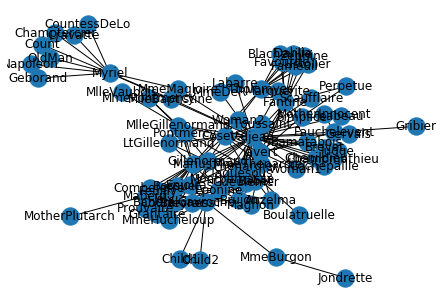

In [61]:
# Part 3: Obtain the data
# Do not modify this cell

# Download the data
lesmis_url = 'http://networkdata.ics.uci.edu/data/lesmis/lesmis.gml' 
response = requests.get(lesmis_url)

# Specify the graph
G = nx.read_gml(BytesIO(response.content))

# Draw the co-appearance graph
layout = nx.spring_layout(G)
nx.draw(G, pos = layout)
labels=nx.draw_networkx_labels(G,pos=layout)
# The labeling isn't super clear; that's okay.  
#     This is just to give us a rough sense of what the graph looks like)


In [73]:
# Part 3, continued: Compute PageRank vector

# Obtaining the adjacency matrix
A = nx.to_numpy_matrix(G) # no need to modify this line

print(A.shape) #this prints the numbers of rows and columns of A, for checking correctness

# Using the adjacency matrix, find the transition matrix
# T = 
#hint1: np.sum(M) returns vector of sums of columns of matrix M
#hint2: M/v divides each column of matrix M by the corresponding element of vector v


# Find the PageRank vector using Power Method:
# ...
# ...
# v = ...



(77, 77)
[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [0]:
# Part 3, continued: Identify the top N most important characters

#print(v)
# then, identify the index of each of the 3 most important characters


# ------------------------------------------------
# Do not modify below the line
# The code below tells us the characters that corresponds to the indices


name = list(labels.keys())
list(enumerate(name))

[(0, 'Myriel'),
 (1, 'Napoleon'),
 (2, 'MlleBaptistine'),
 (3, 'MmeMagloire'),
 (4, 'CountessDeLo'),
 (5, 'Geborand'),
 (6, 'Champtercier'),
 (7, 'Cravatte'),
 (8, 'Count'),
 (9, 'OldMan'),
 (10, 'Labarre'),
 (11, 'Valjean'),
 (12, 'Marguerite'),
 (13, 'MmeDeR'),
 (14, 'Isabeau'),
 (15, 'Gervais'),
 (16, 'Tholomyes'),
 (17, 'Listolier'),
 (18, 'Fameuil'),
 (19, 'Blacheville'),
 (20, 'Favourite'),
 (21, 'Dahlia'),
 (22, 'Zephine'),
 (23, 'Fantine'),
 (24, 'MmeThenardier'),
 (25, 'Thenardier'),
 (26, 'Cosette'),
 (27, 'Javert'),
 (28, 'Fauchelevent'),
 (29, 'Bamatabois'),
 (30, 'Perpetue'),
 (31, 'Simplice'),
 (32, 'Scaufflaire'),
 (33, 'Woman1'),
 (34, 'Judge'),
 (35, 'Champmathieu'),
 (36, 'Brevet'),
 (37, 'Chenildieu'),
 (38, 'Cochepaille'),
 (39, 'Pontmercy'),
 (40, 'Boulatruelle'),
 (41, 'Eponine'),
 (42, 'Anzelma'),
 (43, 'Woman2'),
 (44, 'MotherInnocent'),
 (45, 'Gribier'),
 (46, 'Jondrette'),
 (47, 'MmeBurgon'),
 (48, 'Gavroche'),
 (49, 'Gillenormand'),
 (50, 'Magnon'),
 (51, 'Ml


[ YOUR ANSWER FOR PART 3.  Double click this text to edit.  Type here the answer of the above questions, which you obtain by doing the computation in the above code cell.]

## Reflections

Please briefly write:
1. One new thing that you learn from this project
I learned the application of linear algebra in finding the rank of certain nodes in a graph which can represent different things.
2. One aspect of this project that you found most interesting OR most challenging OR both.
I personally found it challenging to figure out the page rank vector with the eigenvalue and eigenvector method because I was confused by the outputs I was getting.
3. If you discuss any part of the project with anyone ( classmate(s), tutor(s), etc.), please ackowledge them here.
I worked alone

[ YOUR ANSWER HERE.  Double click this text to edit]